# ardd_fatalities.csv 

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
fatalities = pd.read_csv('ardd_fatalities.csv')
fatalities.head()

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20205023,WA,3,2020,Monday,5:05,Multiple,No,Yes,No,...,43,NaN,NaN,NaN,NaN,No,No,40_to_64,Weekend,Night
1,20205028,WA,3,2020,Saturday,4:49,Single,No,No,No,...,18,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekend,Night
2,20201041,NSW,3,2020,Sunday,22:27,Multiple,No,No,No,...,20,Outer Regional Australia,New England and North West,Inverell,National or State Highway,No,No,17_to_25,Weekend,Night
3,20201055,NSW,3,2020,Sunday,0:10,Single,No,No,No,...,18,Outer Regional Australia,Central West,Parkes,Sub-arterial Road,No,No,17_to_25,Weekend,Night
4,20205016,WA,3,2020,Saturday,23:04,Single,No,No,No,...,20,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekend,Night


In [5]:
fatalities.shape

(51202, 23)

In [10]:
fatalities.tail()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
51197,19891498,NSW,1,1989,Sunday,14:35,Multiple,No,-9,No,80,Driver,Male,28,Yes,No,26_to_39,Weekend,Day
51198,19893020,Qld,1,1989,Sunday,4:00,Pedestrian,No,-9,No,60,Pedestrian,Male,18,Yes,No,17_to_25,Weekend,Night
51199,19893229,Qld,1,1989,Sunday,17:00,Pedestrian,No,-9,No,60,Pedestrian,Male,17,Yes,No,17_to_25,Weekend,Day
51200,19893344,Qld,1,1989,Sunday,1:00,Single,No,-9,No,60,Driver,Male,32,Yes,No,26_to_39,Weekend,Night
51201,19892467,Vic,1,1989,Sunday,1:15,Single,No,No,No,100,Passenger,Male,18,Yes,No,17_to_25,Weekend,Night


In [6]:
# Checking for any null value.
print(fatalities.isnull().values.any())

# Checking which column has null values
fatalities.isnull().sum()

True


Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                 0
Crash Type                           0
Bus Involvement                      0
Heavy Rigid Truck Involvement        0
Articulated Truck Involvement        0
Speed Limit                          0
Road User                            0
Gender                               0
Age                                  0
National Remoteness Areas        45869
SA4 Name 2016                    45855
National LGA Name 2017           45854
National Road Type               45865
Christmas Period                     0
Easter Period                        0
Age Group                            0
Day of week                          0
Time of day                          0
dtype: int64

 ### Some initial inference of the data
 - We can discard **National remoteness areas, SA4 Name 2016, National LGA Name 2017, National Road type**.
 - We need some transformation in **age group** column

In [7]:
fatalities = fatalities.drop(columns=['National Remoteness Areas', 'SA4 Name 2016', 'National LGA Name 2017', 'National Road Type'])

In [8]:
# Checking for any null value.
print(fatalities.isnull().values.any())

# Checking which column has null values
fatalities.isnull().sum()

False


Crash ID                         0
State                            0
Month                            0
Year                             0
Dayweek                          0
Time                             0
Crash Type                       0
Bus Involvement                  0
Heavy Rigid Truck Involvement    0
Articulated Truck Involvement    0
Speed Limit                      0
Road User                        0
Gender                           0
Age                              0
Christmas Period                 0
Easter Period                    0
Age Group                        0
Day of week                      0
Time of day                      0
dtype: int64

Bus Involvement
-9        26
No     50213
Yes      963
dtype: int64


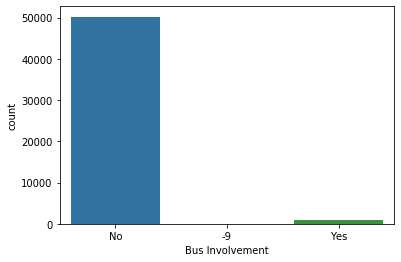

In [18]:
print(fatalities.groupby("Bus Involvement").size())
sns.countplot(fatalities["Bus Involvement"], label = "Crash Type")

Crash Type
Multiple      21852
Pedestrian     8077
Single        21273
dtype: int64


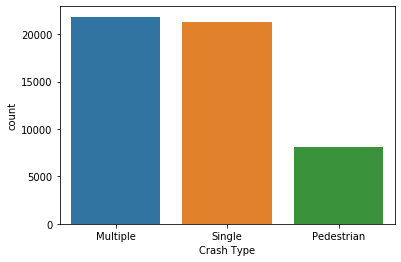

In [17]:
print(fatalities.groupby("Crash Type").size())
sns.countplot(fatalities["Crash Type"], label = "Bus Involvement")

State
ACT      462
NSW    15891
NT      1591
Qld    10059
SA      4414
Tas     1502
Vic    11251
WA      6032
dtype: int64


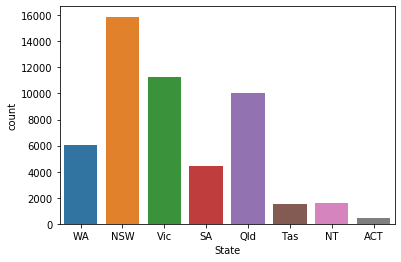

In [15]:
print(fatalities.groupby("State").size())
sns.countplot(fatalities["State"], label = "States")

Heavy Rigid Truck Involvement
-9     20518
No     29179
Yes     1505
dtype: int64


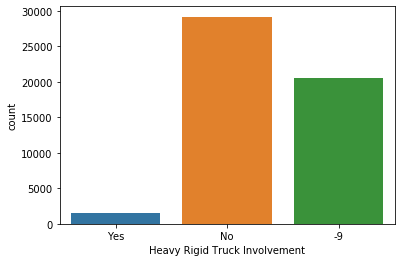

In [20]:
print(fatalities.groupby("Heavy Rigid Truck Involvement").size())
sns.countplot(fatalities["Heavy Rigid Truck Involvement"], label = "HRTI")

Articulated Truck Involvement
-9        26
No     45978
Yes     5198
dtype: int64


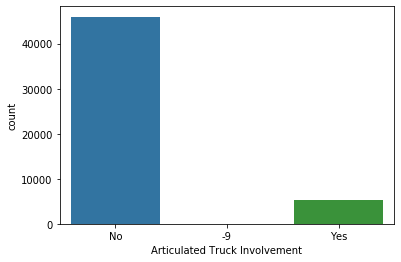

In [21]:
print(fatalities.groupby("Articulated Truck Involvement").size())
sns.countplot(fatalities["Articulated Truck Involvement"], label = "ATI")

Gender
-9                22
Female         14562
Male           36617
Unspecified        1
dtype: int64


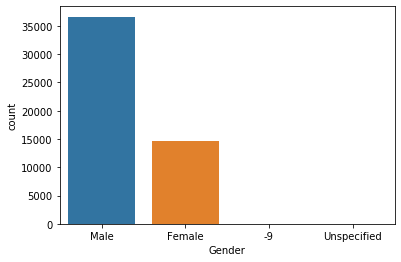

In [22]:
print(fatalities.groupby("Gender").size())
sns.countplot(fatalities["Gender"], label = "Gender")

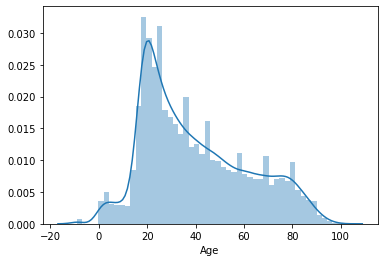

In [28]:
age = fatalities["Age"]
sns.distplot(age)

Christmas Period
No     49599
Yes     1603
dtype: int64


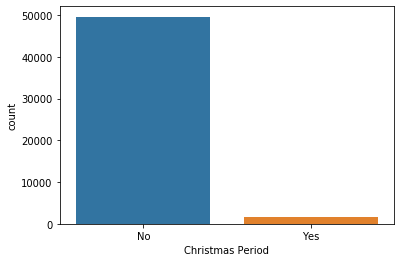

In [30]:
print(fatalities.groupby("Christmas Period").size())
sns.countplot(fatalities["Christmas Period"], label = "Christmas Period ")

Easter Period
No     50963
Yes      239
dtype: int64


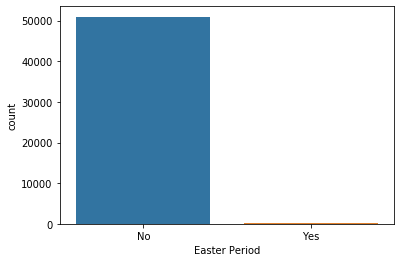

In [31]:
print(fatalities.groupby("Easter Period").size())
sns.countplot(fatalities["Easter Period"], label = "Easter Period ")

Day of week
Weekday    30108
Weekend    21094
dtype: int64


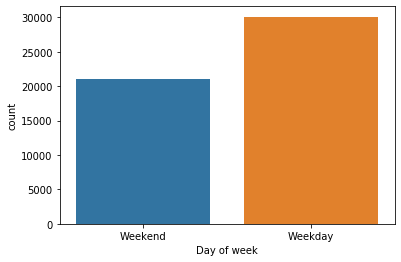

In [33]:
print(fatalities.groupby("Day of week").size())
sns.countplot(fatalities["Day of week"], label = "Day of week")

Time of day
Day      29117
Night    22085
dtype: int64


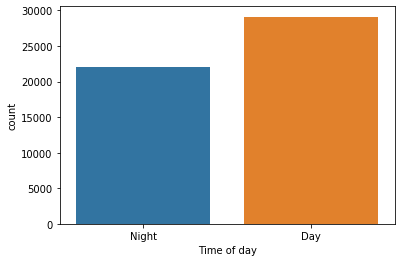

In [34]:
print(fatalities.groupby("Time of day").size())
sns.countplot(fatalities["Time of day"], label = "Time of day")